

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 1*

---

# Interpretable ML - I

## 🏆 학습목표
1. ML 모델의 Interpretability(해석 가능성)의 중요성에 대해 이해한다.
2. 대표적인 Interpretation Method인 Feature Importance에 대해 이해하고 이를 사용해 모델을 해석한다.


### Warm up

#### 다음 영상을 시청해주세요
  - [Explainbale AI](https://youtu.be/6xePkn3-LME?t=151)
    - 2:31부터 8:40까지만 시청하세요.
    - 머신러닝 모델의 작동을 해석하는 것은 왜 중요할까요?
    
#### Permutation Importance의 수학적 정의에 대해 살펴보세요.
  - [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html#outline-of-the-permutation-importance-algorithm)

### 📚 아래 라이브러리를 설치해 주세요.

#### 이번 모듈에서 추가적으로 사용하는 라이브러리는 다음과 같습니다. 설치를 확인해 주세요.
- [**eli5**](https://eli5.readthedocs.io/en/latest/)

In [1]:
!pip3 install eli5
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 9.8 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=b04d06248a7d89d47116f24a98a1a602db94706888b7cefdaf8e1b904a45789b
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

# 1. ML 모델의 Interpretability
## ML 모델은 점점 복잡해지고 있습니다.
우리가 학습한 가장 단순한 모델인 선형 회귀에서는 입력값에 따라 모델의 예측값이 얼마나 달라질지 가늠하기 쉽습니다. 예측에 대한 이유도 충분히 설명할 수 있습니다. 하지만 모델이 점점 복잡해지고 여러 앙상블 기법들이 사용되면서 모델의 성능은 향상되지만 모델의 의사결정 과정을 설명하기 굉장히 어려워집니다. 많은 머신러닝 모델들이 다양한 분야에서 인간과 비슷한 수준의 출력을 내지만, 그 결론들이 어떤 과정을 통해 나온 것인지를 설명하기 어렵습니다. 
 
이를 ML의 `black-box problem`이라 합니다.

## ML 모델을 해석한다는 것은 어떤 뜻일까요?
아래의 과정들이 모두 해당됩니다.
- 모델의 의사결정에 대한 이유를 제시합니다.
- 모델이 주요하게 학습한 규칙 및 피쳐를 찾습니다.  
위 분석을 기반으로, 일반적인 상황에서 모델이 안정적인 결과를 낼 수 있을지, 모델이 비상식적인 출력을 내는 경우가 없을지 검토합니다.

## 왜 ML 모델을 해석하는 것이 중요할까요?
ML 모델을 학습하고 평가 데이터셋에서 좋은 성능을 확인한다면, 모델이 결정을 내린 이유를 궁금해할 필요 없이 모델의 결정을 그냥 믿으면 되지 않을까요?


**1. 모델의 검증 데이터셋에 대한 성능만으로 충분하지 않을 수 있습니다.**
- 많은 현실 세계의 데이터들은 정적이지 않고 변화하며, 모델이 실제 배포되고 서비스될 때 마주할 데이터들은 평가 데이터셋의 데이터와 많이 다를 수 있습니다. 따라서 평가 데이터셋에서의 성능만으로 모델의 성능을 완전히 신뢰하기는 어렵습니다. 평가 데이터셋에서는 괜찮은 예측을 내던 모델도 생소한 데이터에 대해서는 예측하기 어려운 값을 내는 경우가 많습니다.
- 우리가 사용하는 평가지표 또한 완전하지 않습니다. 각 평가지표는 중요하게 다루는 특징들이 약간씩 다르기 때문에, 실제로 모델을 돌려 보면 평가지표에 따라 최적의 모델이 다르게 선택되는 것을 흔히 경험할 수 있습니다. 따라서 평가지표 값만을 보고 모델의 성능을 신뢰하는 것은 위험할 수 있습니다.

**2. 모델을 해석하는 것은 모델 성능 개선에도 도움이 됩니다.**
- 데이터 과학자는 모델의 내부 작동을 이해함으로써 모델의 개선사항을 발견할 수 있습니다. 예를 들어, 중요하다고 여겨지는 특성의 중요도가 낮게 확인될 경우 해당 특성의 분포 조정 또는 추가 전처리의 필요성을 점검하거나 다른 모델 알고리즘을 선택할 수 있습니다. 특성 중요도가 낮은 특성들은 drop하여 과적합을 방지하고 모델의 학습 효율성을 향상시킬 수 있습니다.

**3. 모델이 결정을 내린 이유가 요구되는 상황들이 존재합니다.**
- 은행 대출을 심사하는 머신러닝 모델을 상상해 봅시다. 심사가 거절된 고객이 찾아와 거절된 이유를 물었을 때, 은행은 분명히 이유를 설명할 수 있어야 합니다.
- 큰 예산의 집행이 달린 결정과 같이 고위험 환경에서 사용되는 모델의 경우, 우리는 모델의 결정 이유를 분명하게 파악하여 예상되는 위험을 낮출 수 있습니다.


## 모델을 해석함으로써 우리는 모델의 신뢰도를 높이고 부작용을 줄일 수 있습니다.
- 우리는 모델을 해석하는 과정을 통해 모델의 아래 특성들을 손쉽게 파악할 수 있습니다(Doshi-Velez, F., & Kim, B. (2017)).
    - **Fairness**: 모델의 예측이 인종, 성별 등 특정 집단의 특성을 과대/과소평가하지 않는지 확인하고 개선할 수 있습니다. 
    - **Privacy**: 민감한 정보들이 모델 예측에 의해 노출되지 않고 보호되고 있는지 확인하고 개선할 수 있습니다.
    - **Reliability**: 입력의 작은 변화가 출력의 예상치 못한 큰 변화로 이어지지는 않는지 확인하고 개선할 수 있습니다.
    - **Causality**: 모델이 데이터의 imbalance나 noise 등을 잘 핸들링하고 인과관계만을 잘 모델링하고 있는지 확인하고 개선할 수 있습니다.
    - **Trust**: 당연하게도, 우리는 결정 과정을 보여주지 않는 black-box보다 본인의 결정을 잘 설명하는 시스템에 높은 신뢰를 부여할 수 있습니다.

# 2. Feature Importance
- Feature Importance는 모델의 예측값 (혹은 성능)에 대한 각 특성들의 중요도를 수치로 보여 줍니다. 대표적인 모델 해석 방법 중 하나인 Feature Importance에 대해 알아봅시다.

### 🚗 Case Study: 2022 Fuel Consumption Ratings
- Fuel Consumption Ratings data를 사용해 봅시다.
- 주요 특성에 대한 설명은 아래를 참고하세요.

    - `Fuel consumption`: City and highway fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - the combined rating (55% city, 45% highway) is shown in L/100 km and in miles per imperial gallon (mpg)
    - `CO2 emissions`: the tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving
    - `CO2 rating`: the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)
    - `Smog rating`: the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

### 전처리

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/fuel.csv")

# 컬럼 명을 정리합니다.
df.columns = [
    "year",
    "make",
    "model",
    "class",
    "esize",
    "n_cylinder",
    "ttype",
    "ftype",
    "fcons_cty",
    "fcons_hwy",
    "fcons_comp",
    "fcons_mpg",
    "co2_emsn",
    "co2_rating",
    "smog_rating",
]

# classification target을 생성합니다.
df["is_green"] = df["smog_rating"] >= 6
df["is_green"].value_counts()

# baseline score을 확인합니다.
print("Baseline Score:", df["is_green"].value_counts(normalize=True).max())


# 학습 / 평가 데이터셋을 분리합니다.
train, test = train_test_split(df, test_size=0.2, random_state=42)

# feature과 label을 분리합니다.
features = ["make", "class", "esize", "n_cylinder", "ttype", "ftype", "fcons_mpg"]
target = "is_green"
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

Baseline Score: 0.7257479601087942


### 학습

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder


def get_pipeline():
    return make_pipeline(
        OrdinalEncoder(),
        RandomForestClassifier(
            n_estimators=100, random_state=42, class_weight="balanced"
        ),
    )


pipe = get_pipeline()
pipe.fit(X_train, y_train)
print("검증 정확도", pipe.score(X_test, y_test))

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['make', 'class', 'ttype', 'ftype'],
                                mapping=[{'col': 'make',
                                          'data_type': dtype('O'),
                                          'mapping': Hyundai           1
Audi              2
GMC               3
Lexus             4
Dodge             5
BMW               6
Kia               7
Chevrolet         8
Volkswagen        9
Ram              10
Toyota           11
Bentley          12
MINI             13
Buick            14
Ford             15
Mazda            16
Land Rover       17
Volvo            18
Mercedes-Benz    19
Porsche          20
Jeep             21
Cadillac         22
Honda            23
Lamborghini      24
Infiniti         25
Subaru           26
Jagua...
dtype: int64},
                                         {'col': 'ttype',
                                          'data_type': dtype('O'),
                                          'ma

### 성능 평가

              precision    recall  f1-score   support

       False       0.94      0.93      0.93       322
        True       0.81      0.83      0.82       120

    accuracy                           0.90       442
   macro avg       0.87      0.88      0.88       442
weighted avg       0.90      0.90      0.90       442



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


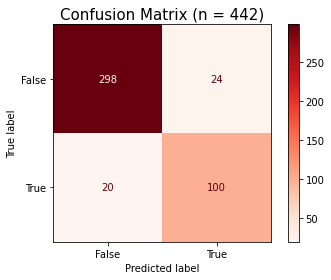

AUC: 0.9542831262939959


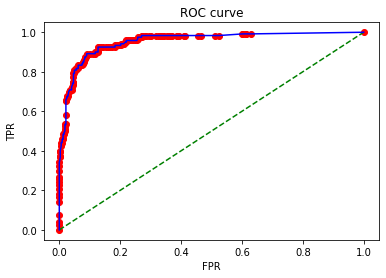

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## 2.1. Feature Importance(Mean decrease impurity, MDI)
- 트리 기반 모델에서는 각 step에서 특정 피쳐에 의해 노드를 분할하여 노드의 불순도를 감소시킵니다.
- 그렇다면, 평균적으로 불순도를 크게 감소시키는 데 사용된 피쳐들은 중요하다고 할 수 있을 것입니다.
- `sklearn`의 트리 기반 모델은 평균 불순도 감소(Mean Decrease Impurity) 값을 사용하는 특성 중요도 계산을 기본적으로 제공합니다.

-  불순도 감소(impurity decrease)는 다음과 같이 계산합니다:

   - $\frac{N_t}{N}$ * (Impurity - $\frac{N_{tR}}{N_t}$ * rightImpurity - $\frac{N_{tL}}{N_t}$ * leftImpurity)

   - $N$: 전체 관측치 수, $N_t$: 현재 노드 t에 존재하는 관측치 수

   - $N_{tL}$, $N_{tR}$: 노드 t 왼쪽(L)/오른쪽(R) 자식노드에 존재하는 관측치 수

   - 만약 `sample_weight`가 주어진다면, $N$, $N_t$, $N_{tR}$, $N_{tL}$는 가중합을 합니다.



- MDI 기반 Feature Importance는 빠르고 간편하게 계산이 가능하다는 장점이 있습니다.

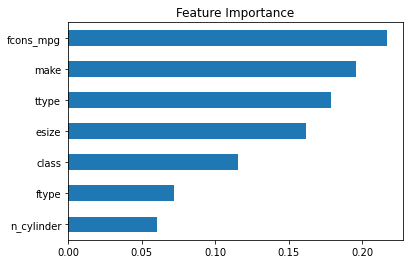

Text(0.5, 1.0, 'Cardinailty')

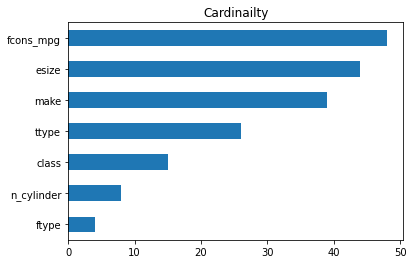

In [6]:
# 특성 중요도
rf = pipe.named_steps["randomforestclassifier"]   # 각 스텝에 접근
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train.nunique().sort_values().plot.barh()
plt.title("Cardinailty")

### Feature Importance의 문제점: High Cardinality
- MDI 기반 Feature Importance는 high cardinality 특성에 높은 값을 부여하는 문제가 있습니다.
- 매 노드 분할 시 cardinality가 높은 특성이 분할 기준 특성이 될 가능성이 높기 때문입니다.

- 아무런 의미가 없지만 cardinality만 높은 난수 특성 `random`을 추가해서 특성 중요도를 확인해봅시다.

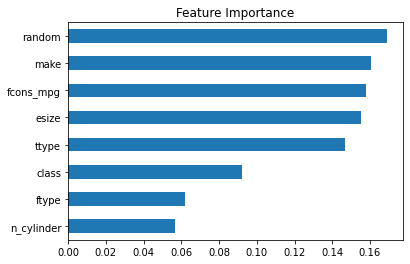

Text(0.5, 1.0, 'Cardinality')

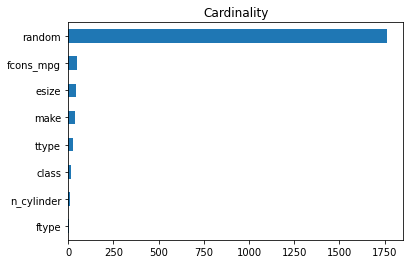

In [7]:
import numpy as np

rand = np.random.RandomState(seed=2)

X_train_random_added = X_train.copy()
X_train_random_added["random"] = rand.randn(len(X_train))

pipe_random_added = get_pipeline()
pipe_random_added.fit(X_train_random_added, y_train)

rf = pipe_random_added.named_steps["randomforestclassifier"]
importances_random_added = pd.Series(
    rf.feature_importances_, X_train_random_added.columns
)

# feature importance 나타내기
importances_random_added.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

# nunique값으로 cardinality 나타내기
X_train_random_added.nunique().sort_values().plot.barh()
plt.title("Cardinality")

- 놀랍게도 `random` 특성의 중요도가 높게 나오는 것을 확인할 수 있습니다!
- MDI 기반 Feature Importance의 경우 cardinality가 너무 높은 특성이 있을 때는 믿을 만한 결과를 내지 못합니다.

## 2.2. Drop-Column Importance
- 각 특성을 사용하지 않고(drop하고) 모델을 학습한 후, 평가 성능을 모든 특성을 사용한 모델의 평가 성능과 비교합니다.
- 특성을 제거하였을 때 평가 성능이 크게 하락했다면 해당 특성이 매우 중요한 특성일 것입니다.
- 이 방법은 이론적으로 가장 좋아 보이지만, 매 특성을 drop한 후 fit을 다시 해야 하기 때문에 매우 느리다는 단점이 있습니다(특성이 n개 존재할 때 n + 1 번 학습이 필요합니다).

In [8]:
# 모든 column을 사용해 학습했을 때의 검증 정확도
score = pipe.score(X_test, y_test)

print(f'Before Drop :: 검증 정확도 {score:.6f}')
dci = pd.Series(dtype=float)

# for 문을 이용하여 한 column씩 drop해 볼 수 있다. -> n+1 의 학습이 이뤄지기 때문에 매우 느리다는 단점이 있다.
for feature in features:
    p = get_pipeline()

    # feature을 drop하여 모델을 재학습합니다.
    p.fit(X_train.drop(columns=[feature], axis=1), y_train)
    score_dropped = p.score(X_test.drop(columns=[feature], axis=1), y_test)
    print(f"Drop {feature} :: 검증 정확도 {score_dropped:.6f}")

    # drop-column importance는 해당 특성을 drop했을 때의 성능 하락폭으로 정의됩니다.
    dci[feature] = score - score_dropped

Before Drop :: 검증 정확도 0.900452
Drop make :: 검증 정확도 0.886878
Drop class :: 검증 정확도 0.904977
Drop esize :: 검증 정확도 0.898190
Drop n_cylinder :: 검증 정확도 0.902715
Drop ttype :: 검증 정확도 0.866516
Drop ftype :: 검증 정확도 0.895928
Drop fcons_mpg :: 검증 정확도 0.893665


Text(0.5, 1.0, 'Drop-Column Importance')

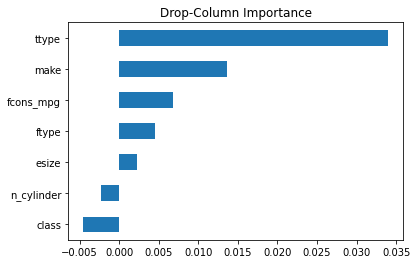

In [9]:
%matplotlib inline
dci.sort_values().plot.barh()
plt.title("Drop-Column Importance")

## 3. Permutation Importance
- Drop-Column Importance는 안정적이고 이론적으로 가장 괜찮은 특성 중요도 값을 제공하지만, 모델을 여러 번 학습시켜야 하는 문제점이 있습니다.
- Permutation Importance는 색다른 방법으로 이 문제를 해결합니다. 모델을 재학습시키지 않고, 기존 모델에서 각 특성에 노이즈를 주어 모델이 해당 특성을 의사결정에 사용하지 못하게 만들었을 때 성능이 얼마나 감소하는지 확인합니다.
- 이때 노이즈를 주는 가장 간단한 방법이 그 특성값들을 샘플들 내에서 섞는 것(shuffle, permutation) 입니다.

#### Permutation Importance의 장점과 단점
- **장점**
  - 재학습이 필요 없습니다.
  - 모든 모델에 범용적으로 적용 가능한 방법입니다.
  - Feature Importance(MDI)보다 high cardinality 특성에 덜 치우친 결과를 냅니다.
- **단점**
  - 강한 상관관계가 있는 특성들이 존재할 때, 잘못된 값을 낼 수 있습니다.
    1. 상관관계가 있는 두 특성 중 하나의 값에 노이즈를 주게 되면 비현실적인 데이터로 모델이 결과를 도출하게 됩니다.   
      ex) 키와 몸무게의 경우 키 2m & 몸무게 30kg
      
    2. 하나의 값에 노이즈를 주어도 해당 정보를 다른 특성으로부터 얻을 수 있고 성능은 크게 하락하지 않을 수 있습니다. 
      - 결과적으로 섞인 특성(및 해당 특성과 강력한 관계가 있는 특성 모두)은 실제로 중요한 특성일 수 있음에도 낮은 PI를 보이게 됩니다.

In [10]:
pi = pd.Series(dtype=float)

n_iter = 10  # 랜덤으로 특성을 섞어 평가 성능을 확인하는 과정을 몇 번 반복할지 결정합니다.
np.random.seed(2) # random seed를 고정하여 반복적으로 아래 코드를 수행해도 같은 결과가 나오게 합니다.

# 1. for문으로 해보기
for feature in features:  # feature 별로
    X_test_permed = X_test.copy()

    # 모델을 재학습하지 않고, 기존 모델에서 feature 값을 여러 번(n_iter) 섞고 검증하여 평균 성능을 확인합니다.
    scores_permutated = []    # 중요도 값을 feature drop 별로 계속 저장해줌
    for _ in range(n_iter):   # iteration 값을 정해줄 수 있음
        X_test_permed[feature] = np.random.permutation(X_test_permed[feature])    # step1. .permutation으로 shuffle해줌
        scores_permutated.append(pipe.score(X_test_permed, y_test))   # step2. 학습이 끝난 모델에 대해 score 확인
    avg_score_permutated = np.mean(scores_permutated)   # iteration한 만큼의 score들이 나올텐데 그 값들의 average 값인것
    print(f"Perm {feature} :: 검증 정확도 {avg_score_permutated:.6f}")

    # permutation importance는 해당 특성을 랜덤으로 섞었을 때의 성능 하락폭으로 정의됩니다.
    pi[feature] = score - avg_score_permutated

Perm make :: 검증 정확도 0.823756
Perm class :: 검증 정확도 0.871041
Perm esize :: 검증 정확도 0.837783
Perm n_cylinder :: 검증 정확도 0.883484
Perm ttype :: 검증 정확도 0.811991
Perm ftype :: 검증 정확도 0.856787
Perm fcons_mpg :: 검증 정확도 0.806561


Text(0.5, 1.0, 'Permutation Importance')

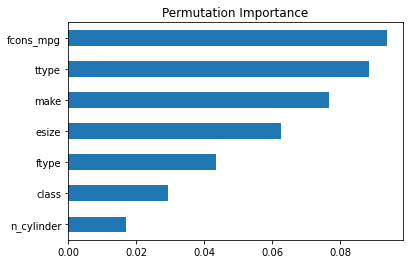

In [11]:
pi.sort_values().plot.barh()
plt.title("Permutation Importance")

### cf) Permutation은 해당 특성의 전체 분포를 변화시키지 않습니다.
- Permutation은 특성값들의 순서만 변경하며, 전체 분포는 변화시키지 않습니다.

In [12]:
print(X_test["class"].value_counts())

SUV: Small                 83
Pickup truck: Standard     55
Mid-size                   53
SUV: Standard              50
Compact                    48
Two-seater                 40
Subcompact                 39
Full-size                  27
Minicompact                21
Station wagon: Small        8
Pickup truck: Small         5
Station wagon: Mid-size     5
Special purpose vehicle     4
Van: Passenger              2
Minivan                     2
Name: class, dtype: int64


In [15]:
X_test_permed = X_test.copy()
X_test_permed["class"] = np.random.permutation(X_test["class"])
print(X_test_permed["class"].value_counts())

SUV: Small                 83
Pickup truck: Standard     55
Mid-size                   53
SUV: Standard              50
Compact                    48
Two-seater                 40
Subcompact                 39
Full-size                  27
Minicompact                21
Station wagon: Small        8
Pickup truck: Small         5
Station wagon: Mid-size     5
Special purpose vehicle     4
Van: Passenger              2
Minivan                     2
Name: class, dtype: int64


### `eli5` 라이브러리 사용해 Permutation Importance를 계산해 봅시다.
- `eli5` 라이브러리는 Permutation Importance를 쉽게 계산하고 시각화하도록 도와줍니다.
eli5 에 관한 문서를 확인해 보세요:
- [eli5.sklearn.PermutationImportance](https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance)
- [eli5.show_weights](https://eli5.readthedocs.io/en/latest/autodocs/eli5.html#eli5.show_weights)
- [scikit-learn user guide, `scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

In [16]:
# 2. eli5로 permutation importance 계산해보기
feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

NameError: ignored

In [ ]:
# 특성별 score을 확인합니다.
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0851 ± 0.0196,fcons_mpg
0.0821 ± 0.0202,ttype
0.0688 ± 0.0145,esize
0.0683 ± 0.0165,make
0.0371 ± 0.0152,ftype
0.0321 ± 0.0180,class
0.0145 ± 0.0161,n_cylinder


In [ ]:
pipe[0]

### cf) Permutation Importance는 Feature Importance보다 Cardinality만 높은 특성에 덜 민감합니다.
- Random 특성의 MDI, PI를 비교해 보세요.

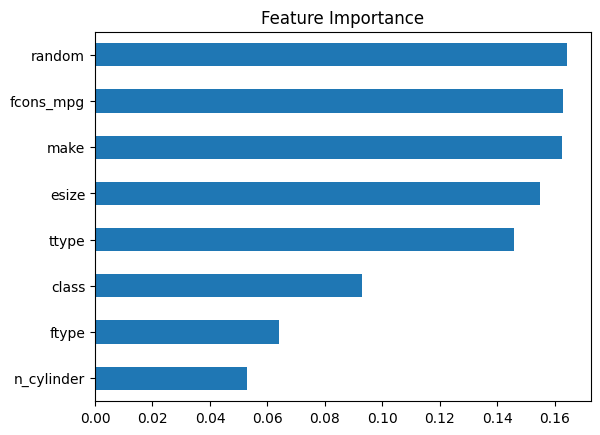

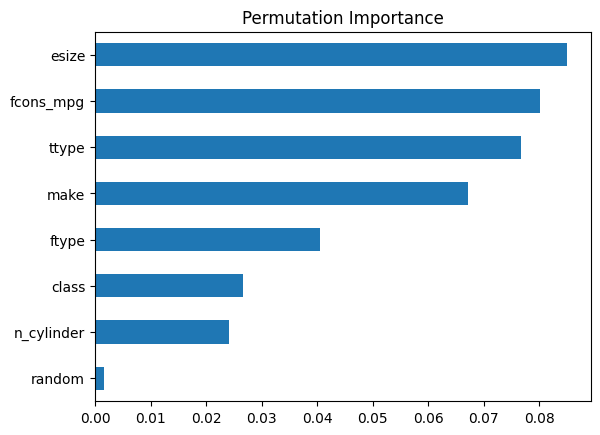

In [ ]:
# Random 특성 추가
X_train_random_added = X_train.copy()
X_test_random_added = X_test.copy()
X_train_random_added["random"] = rand.randn(len(X_train))
X_test_random_added["random"] = rand.randn(len(X_test))

# 모델 학습
pipe_random_added = get_pipeline()
pipe_random_added.fit(X_train_random_added, y_train)
rf = pipe_random_added.named_steps["randomforestclassifier"]

# MDI 계산
importances_random_added = pd.Series(
    rf.feature_importances_, X_train_random_added.columns
)
importances_random_added.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

# PI 계산
permuter = PermutationImportance(
    pipe_random_added.named_steps["randomforestclassifier"],  # model
    scoring="accuracy",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=2,
)

# 스코어를 다시 계산합니다.
X_test_preprocessed = pipe_random_added[0].transform(X_test_random_added)
permuter.fit(X_test_preprocessed, y_test)

feature_names = X_test_random_added.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")
plt.show()

### 특성 중요도를 파악한 후, 중요도가 낮은 특성은 drop하는 방식으로 특성 선택을 진행할 수 있습니다.
- 불필요하게 많은 특성들은 오히려 과적합을 유발하고, 모델 학습의 속도를 느리게 합니다.

## 👏 마무리
#### 이번 노트에서는 
- 모델 해석의 중요성에 대해 이해하였습니다.
- 모델 해석 방법 중 다양한 feature importance의 방법을 배웠습니다. 
<br></br>

#### 학습 후 아래 질문에 답해보세요

1. 모델을 해석하는 것이 왜 중요한가요? 
2. MDI의 단점은 무엇인가요?
3. Drop column importance와 Permutatiom importance의 차이는 무엇인가요?
4. Permutatiom importance의 장단점은 무엇인가요?


# References
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)
- [Feature Importance in Decision Trees](https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/)
- [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html#outline-of-the-permutation-importance-algorithm)
- [eli5.sklearn.PermutationImportance](https://eli5.readthedocs.io/en/latest/autodocs/sklearn.html#eli5.sklearn.permutation_importance.PermutationImportance)
- [eli5.show_weights](https://eli5.readthedocs.io/en/latest/autodocs/eli5.html#eli5.show_weights)
    